An analysis of movie review data following guidance from Dataquest.

In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

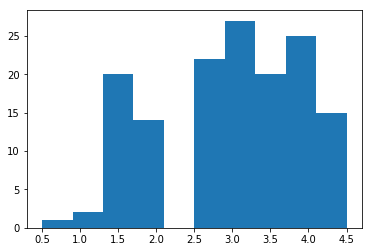

In [3]:
plt.hist(movies["Metacritic_norm_round"])
plt.show()

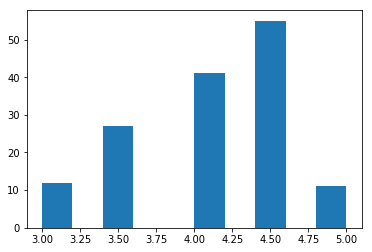

In [4]:
plt.hist(movies["Fandango_Stars"])
plt.show()

In [5]:
fandango = movies["Fandango_Stars"]
metacritic = movies["Metacritic_norm_round"]
fandango.mean()
metacritic.mean()

2.9726027397260273

In [6]:
print(fandango.mean())
print(metacritic.mean())

4.089041095890411
2.9726027397260273


In [7]:
print(fandango.median())
print(metacritic.median())

4.0
3.0


In [8]:
import numpy as np
print(np.std(fandango))
print(np.std(metacritic))

0.5385321612699531
0.9875610297038631


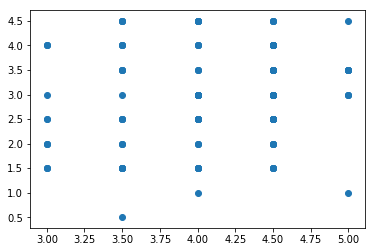

In [9]:
plt.scatter(fandango, metacritic)
plt.show()

In [12]:
movies["fm_diff"] = abs(metacritic - fandango)
movies = movies.sort_values("fm_diff", ascending=False)
print(movies.head(5))

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [13]:
import scipy.stats as sc
sc.pearsonr(fandango, metacritic)

(0.17844919073895918, 0.031161516228523815)

In [14]:
sc.linregress(fandango, metacritic)

LinregressResult(slope=0.32724037528308, intercept=1.6345033969589124, rvalue=0.17844919073895918, pvalue=0.031161516228524012, stderr=0.1503639404513394)

In [15]:
pred_3 = 3 * 0.3272 + 1.6345
pred_3

2.6161000000000003

In [16]:
sc.linregress(metacritic, fandango)

LinregressResult(slope=0.09731107797392856, intercept=3.799773918899418, rvalue=0.17844919073895918, pvalue=0.031161516228524012, stderr=0.04471354465679832)

In [17]:
pred_3 = 0.0973 * 3.0 + 3.7998
print(pred_3)

4.0916999999999994


In [18]:
slope = 0.0973
intercept = 3.7998
def meta(num):
    return num * slope + intercept
print(meta(1.0))
print(meta(5.0))

3.8971
4.2863


[]

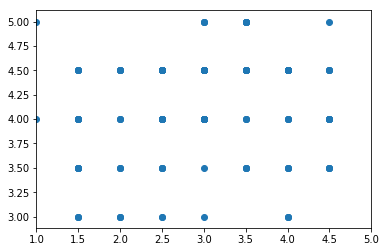

In [19]:
plt.scatter(metacritic, fandango)
plt.xlim(1, 5)
plt.plot()